In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_csv('./Afegan_Raw.csv', sep=";", index_col=0)

In [98]:
df.head(10)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,8.18,62,327582,17.5,17.5,0.476,10.0
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,8.13,64,31731688,17.7,17.7,0.470,9.9
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,8.52,67,3696958,17.9,18.0,0.463,9.8
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,7.87,68,2978599,18.2,18.2,0.454,9.5
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,9.20,66,2883167,18.4,18.4,0.448,9.2
2009,58.6,281,77,0.01,5676221682,63,2861,16.2,106,63,9.42,63,284331,18.6,18.7,0.434,8.9
2008,58.1,287,80,0.03,2587392536,64,1599,15.7,110,64,8.33,64,2729431,18.8,18.9,0.433,8.7
2007,57.5,295,82,0.02,1091015598,63,1141,15.2,113,63,6.73,63,26616792,19.0,19.1,0.415,8.4
2006,57.3,295,84,0.03,1717151751,64,1990,14.7,116,58,7.43,58,2589345,19.2,19.3,0.405,8.1


In [99]:
df.shape

(15, 17)

In [100]:
dfm = df.mean()

dfdp = df.std()

dfauto = (df - dfm) / dfdp

dfauto.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,1.354619,0.020364,-1.789967,-0.627896,1.410223,-1.344103,-0.837956,1.601259,-1.798195,0.362721,-0.113208,0.551570,-0.713928,0.163652,0.298303,1.345650,1.236943
2013,1.354619,-0.019479,-1.556493,-0.627896,1.399983,-0.282969,-0.864588,1.360106,-1.565670,0.576086,-0.185162,0.656299,2.067607,0.197746,0.327644,1.221180,1.172294
2012,1.103764,0.033645,-1.206282,-0.627896,-0.800513,1.308732,0.147849,1.118952,-1.255636,0.842793,0.376080,0.813391,-0.415494,0.231841,0.371656,1.075967,1.107645
2011,0.915622,0.073488,-0.972808,-0.627896,1.324341,1.839299,0.244927,0.926029,-0.945603,0.896134,-0.559323,0.865756,-0.479121,0.282982,0.400998,0.889263,0.913700
2010,0.664767,0.126612,-0.622597,-0.627896,1.617342,0.778165,-0.194928,0.684876,-0.558060,0.789452,1.354654,0.761027,-0.487574,0.317076,0.430339,0.764794,0.719754


In [101]:
X = np.asarray(dfauto.iloc[:,0:17])
np.diagonal(X)

array([ 1.35461902, -0.01947881, -1.20628178, -0.62789559,  1.61734202,
       -0.81353607, -0.36245009, -0.03858455,  0.52705713,  0.36272102,
        0.76463146, -0.54807923,  1.20387019, -2.46160092, -1.9022939 ])

In [102]:
pca = PCA(n_components=10)
pca.fit(X)
pca.components_

array([[-3.33579930e-01, -3.87532739e-02,  3.07731202e-01,
         1.43108762e-02, -2.61258059e-01, -9.43082355e-02,
         2.02946845e-01, -3.28539376e-01,  3.05311809e-01,
        -2.67179382e-01, -5.95735283e-02, -2.75858571e-01,
         5.03162724e-04, -2.03762809e-01, -2.42029444e-01,
        -3.32973785e-01, -3.32907723e-01],
       [-4.75869616e-03, -1.29217703e-01,  2.06554345e-01,
         4.02832888e-01, -1.49559433e-01,  2.55361545e-01,
        -4.53675948e-01, -9.70771033e-02,  2.05097446e-01,
        -9.84694564e-02, -4.32991750e-02, -9.90027739e-02,
         2.85298373e-01,  4.69765936e-01,  3.27274236e-01,
        -4.13947251e-02, -3.43951396e-02],
       [ 5.64798159e-02, -5.87022644e-01, -1.19619091e-01,
        -3.15691468e-01,  1.48386922e-01, -1.20108275e-01,
        -9.02989694e-02,  6.54530202e-02, -1.27509274e-01,
        -1.06562665e-01, -2.57612279e-01, -8.91617835e-02,
         5.31703347e-01,  8.15166257e-02, -3.10777504e-01,
        -3.66669419e-02, -1.2

In [103]:
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 2)

array([0.52, 0.14, 0.1 , 0.09, 0.06, 0.04, 0.02, 0.02, 0.01, 0.  ])

In [104]:
pca.explained_variance_ratio_.cumsum()

array([0.51577523, 0.65632241, 0.75989929, 0.85217512, 0.90771717,
       0.94954793, 0.96838465, 0.98470061, 0.99676837, 0.99947305])

In [105]:
pca = PCA(n_components=4)
pca.fit(X)
pca.transform(X)

array([[-3.70737673e+00, -1.54282149e+00,  6.75060457e-01,
         2.16134443e-01],
       [-3.61786022e+00, -3.35461347e-01,  1.96296020e+00,
         1.79662789e-01],
       [-2.72132809e+00, -6.41437652e-01, -3.00781917e-01,
        -4.28849038e-01],
       [-2.87948778e+00, -6.81558008e-01,  2.90094397e-02,
        -3.78754093e-01],
       [-2.52295870e+00, -6.54209278e-01, -3.89014672e-01,
        -1.36186285e+00],
       [-1.56212924e+00, -9.57733696e-01, -6.36702308e-01,
        -9.01873880e-01],
       [-9.28220579e-01,  9.63857518e-01, -1.31199993e+00,
         1.26040009e+00],
       [-1.20573133e-01,  1.31980625e+00,  7.00779713e-01,
         2.65505189e+00],
       [ 3.33519323e-01,  1.36254734e+00, -1.20544778e+00,
         1.98016690e+00],
       [ 3.32761108e-01,  1.22120132e+00, -1.49585596e+00,
        -2.39928787e-01],
       [ 2.28285323e+00,  2.82100763e+00,  4.60558453e-02,
        -2.06338845e+00],
       [ 1.67118704e+00,  1.12433616e+00, -9.00406185e-01,
      

In [106]:
PCA1 = pca.transform(X)[:, 0]
PCA2 = pca.transform(X)[:, 1]
PCA3 = pca.transform(X)[:, 2]
PCA4 = pca.transform(X)[:, 3]
df['PCA1'] = PCA1
df['PCA2'] = PCA2
df['PCA3'] = PCA3
df['PCA4'] = PCA4
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,PCA1,PCA2,PCA3,PCA4
Year,,,,,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,...,62,327582,17.5,17.5,0.476,10.0,-3.707377,-1.542821,0.675060,0.216134
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,...,64,31731688,17.7,17.7,0.470,9.9,-3.617860,-0.335461,1.962960,0.179663
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,...,67,3696958,17.9,18.0,0.463,9.8,-2.721328,-0.641438,-0.300782,-0.428849
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,...,68,2978599,18.2,18.2,0.454,9.5,-2.879488,-0.681558,0.029009,-0.378754
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,...,66,2883167,18.4,18.4,0.448,9.2,-2.522959,-0.654209,-0.389015,-1.361863


In [107]:
X = df.loc[:, ['PCA1', 'PCA2']]

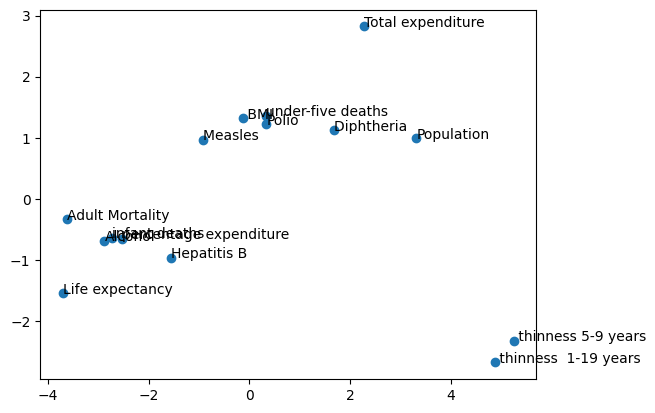

In [108]:
fig, ax = plt.subplots()
ax.scatter(X['PCA1'], X['PCA2'])
text = [ax.text(x, y, t) for x, y, t in zip(PCA1, PCA2, df.columns)]
plt.show()

In [109]:
valores_k = []
S = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(X)
    valores_k.append(i)
    S.append(metrics.silhouette_score(X, kmeans.labels_))

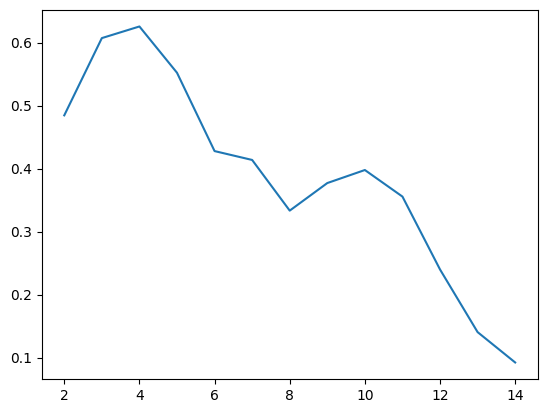

In [110]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [111]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(X)
kmeans.labels_
centroids = kmeans.cluster_centers_
metrics.silhouette_score(X, kmeans.labels_)

0.6255548703951249

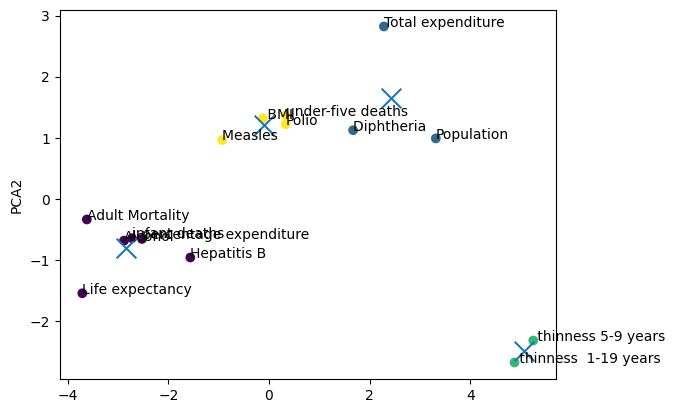

In [112]:
fig, ax = plt.subplots()
ax.scatter(X['PCA1'], X['PCA2'], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200)
plt.ylabel('PCA1')
plt.ylabel('PCA2')
text = [ax.text(x, y, t) for x, y, t in zip(PCA1, PCA2, df.columns)]
plt.show()